In [1]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

### Random walk over $ \mathbb{Z}^2 $, a brief statistical summary

The concept of a random walk is very straightforward. Given some mathematical space, one may assign a probability function to every possible direction that could be defined from any given point in that particular space. The said function could be continuous or discrete, depending on the nature of the space in question. In any case, one can, then, generate a sequence of neighboring points by "throwing the dices", _i.e._ by mapping the defined probabilities (and its associated directions) to the outcome of a random event generator. To make things more clear, let us look to a classic scenario: a symmetric random walk over the two-dimensional square lattice, usually denoted as $ \mathbb{Z}^2 $.

In this particular context, from any given site we may lay on, there are four possible directions of movement: up, down, left or right. Let $\mathcal{A} = \left\lbrace U, D, L, R \right\rbrace$ be the set that formally represents all these possibilities. Well, if we want our random walk to be symmetric, then it's only reasonable to consider a fair $\#(\mathcal{A})$-sided dice to decide how we should perform each step. Here, as $\#(\mathcal{A}) = 4$, a fair [D4](https://en.wikipedia.org/wiki/Four-sided_die) will do the trick.

Rigorously, a symmetric random walk over $ \mathbb{Z}^2 $, with a fixed number $n$ of steps, is determined by the stochastic process $( S_{k} )_{k = 0}^{n}$, where $S_{0}$ denotes the initial site in our journey and, for $k \geq 1$, the next elements of the sequence are defined as $$ S_{k} = S_{0} + \sum_{\ell = 1}^{k} X_{\ell} \, ,$$ with $X_{\ell}$ being random vectors representing the directions in $\mathcal{A}$, following the distribution of a fair 4-sided dice. Hence, given any $x \in \mathcal{A}$, one has $\mathbb{P}(X_{\ell} \equiv x) = 1/4$.

In [2]:
def D4():
    return np.random.randint(0,4)

def step(roll, x, y):
    if (roll == 0):
        x += 1
    elif (roll == 1):
        y += 1
    elif (roll == 2):
        x -= 1
    else:
        y -= 1
    
    return [x,y]

def walk(N, x_arr, y_arr):
    x_arr = [0]
    y_arr = [0]
    
    for lil_step in range(0, N):
        dice_roll = D4()
        new_pos = step(dice_roll, x_arr[lil_step], y_arr[lil_step])
        x_arr.append(new_pos[0])
        y_arr.append(new_pos[1])
        
    return x_arr, y_arr

now that we have defined all the auxiliar functions, we may now simulate/generate some random walks to see their visual "fingerprints" and start studying its behaviors... let us generate a few plots!

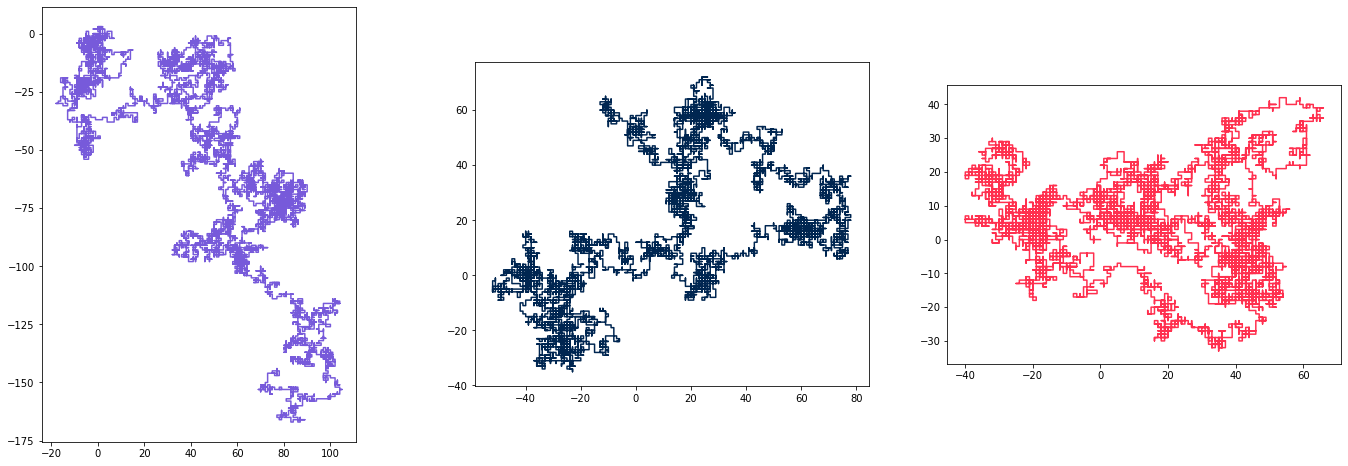

In [4]:
fig, axs = plt.subplots(1, 3, figsize = (24,8))
color_array = ['#775ada', '#002651', '#ff304f']

for path in range(0, 3):
    X = []
    Y = []
    num_steps = 10000

    drunk_guy = walk(num_steps, X, Y)
    X = drunk_guy[0]
    Y = drunk_guy[1]
    
    axs[path].plot(X, Y, color = color_array[path])
    axs[path].set(aspect = 1)

plt.show()

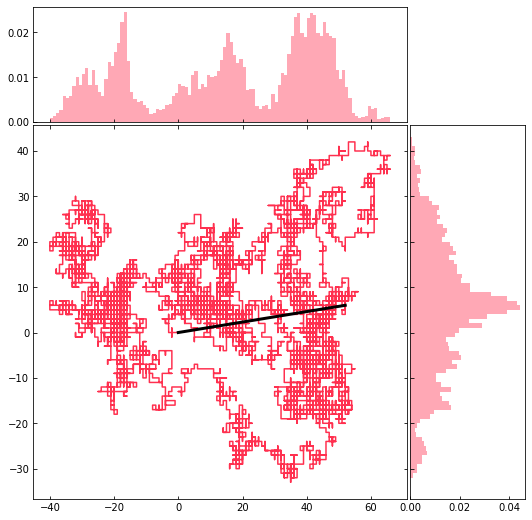

In [8]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

walk_box = [left, bottom, width, height]
xVisitHist_box = [left, bottom + height + spacing, width, 0.2]
yVisitHist_box = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize=(8, 8))

ax_walk = plt.axes(walk_box)
ax_walk.tick_params(direction = 'in', top = True, right = True)
ax_xVisitHist = plt.axes(xVisitHist_box)
ax_xVisitHist.tick_params(direction = 'in', labelbottom = False)
ax_yVisitHist = plt.axes(yVisitHist_box)
ax_yVisitHist.tick_params(direction = 'in', labelleft = False)

ax_walk.plot(X, Y, color = color_array[2])
ax_walk.plot([X[0], X[num_steps]], [Y[0], Y[num_steps]], color = 'k',
                linestyle = '-', linewidth = 3)


binwidth = 1
lim = np.ceil(np.abs([X, Y]).max() / binwidth) * binwidth
bins = np.arange(-lim, lim + binwidth, binwidth)

ax_xVisitHist.hist(X, bins = bins, color = '#ffa8b5', density = True) # or color = 'salmon', maybe
ax_yVisitHist.hist(Y, bins = bins, color = '#ffa8b5', orientation = 'horizontal', density = True)

ax_xVisitHist.set_xlim(ax_walk.get_xlim())
ax_yVisitHist.set_ylim(ax_walk.get_ylim())

plt.show()

In [43]:
K = 1000
num_steps = 10000
records_squaredR = []

for travel in range(0, K):
    X = []
    Y = []
    
    drunk_guy = walk(num_steps, X, Y)
    X = drunk_guy[0]
    Y = drunk_guy[1]

    squared_radius = (X[num_steps] - X[0])**2 + (Y[num_steps] - Y[0])**2
    records_squaredR.append(squared_radius)
    
records_radius = np.sqrt(records_squaredR)

In [44]:
print(r"√<R²> = " + str(np.sqrt(np.average(records_squaredR))))
print(r"<R> = " + str(np.average(records_radius)))
print(r"√n = " + str(np.sqrt(num_steps)))

√<R²> = 100.02149768924679
<R> = 88.20302586200508
√n = 100.0


So, we can see that $ \sqrt{\langle R^2 \rangle} \sim \sqrt{n} $

Equivalently, one can say that the average squared distance $\langle R^2 \rangle$ for the 2D random walk over the square lattice ($\mathbb{Z}^2$) is _probably_ equal to the number of steps $n$

(Of course, our result is not a proof, but rather some sort of statistical "evidence")

Let us now look up to the apparent distributions for $R^2$ and $R$, using histograms

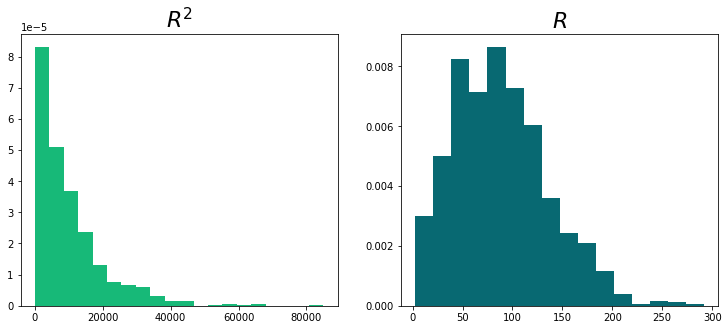

In [165]:
fig, axs = plt.subplots(1, 2, figsize = (12.5, 5))

axs[0].hist(records_squaredR, bins = 20, color = '#17b978', density = True)
axs[1].hist(records_radius, bins = 16, color = '#086972', density = True)
axs[0].set_title("$R^2$", size = 22)
axs[1].set_title("$R$", size = 22)

plt.show()

some of the insights from the $R^2$ still hold true... (explain!)

but, what probability distribution $R$ follows? from the histogram picture, some of them comes to mind: $\chi^2$ (with $k=2 \text{ or } 3$), Maxwell-Boltzmann, Gamma (with $\alpha = 2 \text{ or } 3$), Rayleigh... I will stop right here

in order to decide between these four, we are going to apply a particular test for comparing distributions: a qq-plot! 

this method, however, is only *visual*

to make the analysis a little bit more robust/certain, we are also going to implement certain numerical metrics (MSE and MAE) for the comparison

In [137]:
# we now define the quantile functions (inverses of CDFs) for the above probability distributions
string_testFunc = ["Chi-squared ($k = 3$)", "Maxwell-Boltzmann", 
                   r"Gamma ($\alpha = 2$)", "Rayleigh"]

def quantilTest(x, func_label):
    if (func_label == 0):
        return stat.chi2.ppf(x, 3, loc = 0, scale = 1)
    elif (func_label == 1):
        return stat.maxwell.ppf(x, loc = 0, scale = 1)
    elif (func_label == 2):
        return stat.gamma.ppf(x, 2, loc = 0, scale = 1)
    else:
        return stat.rayleigh.ppf(x, loc = 0, scale = 1)

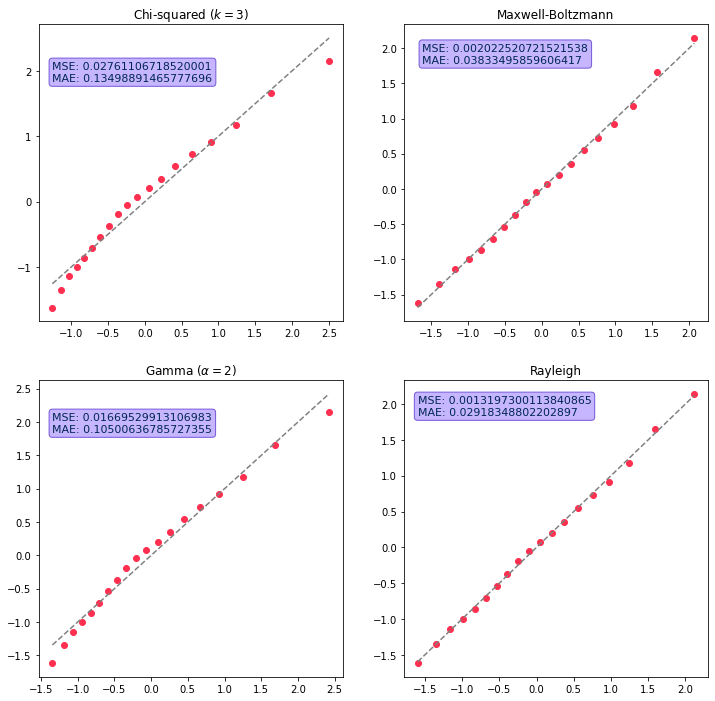

In [138]:
sorted_recordsR = np.sort(records_radius)

fig, axs = plt.subplots(2, 2, figsize = (12, 12))
coords_axs = [(0,0), (0,1), (1,0), (1,1)]

k = 20
alpha_values = np.arange(float(1)/k, 1, float(1)/k)
quantiles_indexes = np.floor(len(records_radius) * alpha_values) + 1

qEmpir = []
for index in quantiles_indexes:
    index = int(index)
    qEmpir.append(sorted_recordsR[index])

standard_qEmpir = (qEmpir - np.mean(qEmpir)) / np.std(qEmpir)

for pair in coords_axs:
    label = (2 * pair[0]) + pair[1]
    qTheor = quantilTest(alpha_values, label)
    standard_qTheor = (qTheor - np.mean(qTheor)) / np.std(qTheor)
    
    MSE = np.mean(np.power((standard_qEmpir - standard_qTheor), 2))
    MAE = np.mean(np.abs(standard_qEmpir - standard_qTheor))
    
    true_minmax = np.min([np.max(standard_qEmpir), np.max(standard_qTheor)])
    true_maxmin = np.max([np.min(standard_qEmpir), np.min(standard_qTheor)])
    
    metrics_textbox = axs[pair].text(true_maxmin, true_minmax, 
                                     "MSE: " + str(MSE) + "\n" + "MAE: " + str(MAE), 
                                     color = '#002651', size = 11, rotation = 0,
                                     ha = "left", va = "top",
                                     bbox = dict(boxstyle = "round", 
                                                 ec = "#775ada", 
                                                 fc = "#c6b5ff")
                                    )

    axs[pair].plot(standard_qTheor, standard_qTheor, color = 'gray', linestyle = '--')
    axs[pair].scatter(standard_qTheor, standard_qEmpir, color = '#ff304f')
    axs[pair].set_title(string_testFunc[label])
    
plt.show()

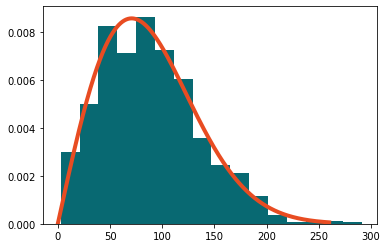

In [166]:
rads = np.arange(0, 260, 0.1)
rayleighDist = 2 * (rads/num_steps) * np.exp(-np.power(rads,2) / num_steps)

plt.hist(records_radius, bins = 16, color = '#086972', density = True)
plt.plot(rads, rayleighDist, color = '#e84c22', linewidth = 4)
plt.show()